# compare RMSD of different periods and sites

In [1]:
import pandas as pd
import numpy as np
import pywt
import wavefuncs as wave
import plotter as p

from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from numpy.polynomial import Polynomial as P
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# global plotting settings
plt.style.use('ggplot')
# text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1') 

## 6 month intervals

In [3]:
# df = wave.pd_read_from_drive('FLX_JP-BBY') # read from google drive into pd.DataFrame
# df = wave.read('FLX_JP-BBY', method='url')
df = wave.read('FLX_JP-BBY', method='file')

In [4]:
df = df.replace(-9999, np.nan) # replace missing with nan
df['date'] = pd.to_datetime(df['TIMESTAMP_START'], format='%Y%m%d%H%M') # parse timestamp to new column 'date'
df = df.set_index(df['date'])

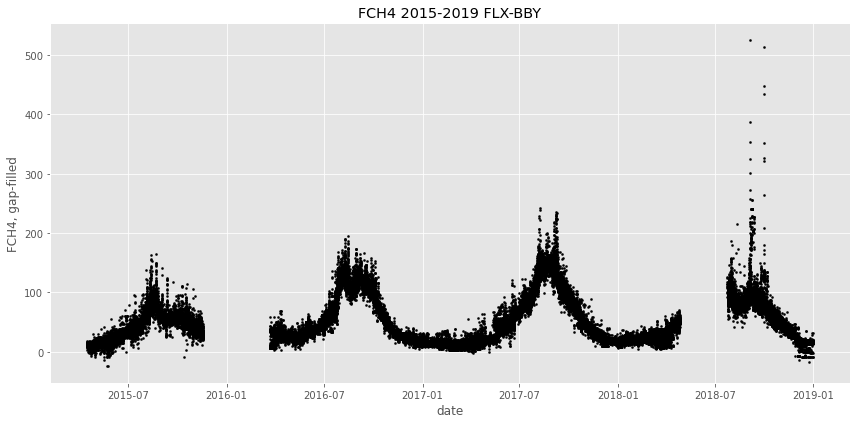

In [5]:
p.date(df.index, df['FCH4_F'], xlabel='date', ylabel='FCH4, gap-filled', title="FCH4 2015-2019 FLX-BBY")

In [6]:
dates = [pd.date_range(start, stop, freq='30min') for [start, stop] in [['2015-01', '2015-07'], 
                                                                        ['2015-07', '2016-01'], 
                                                                        ['2016-01', '2016-07'], 
                                                                        ['2016-07', '2017-01'], 
                                                                        ['2017-01', '2017-07'], 
                                                                        ['2017-07', '2018-01'], 
                                                                        ['2018-01', '2018-07'], 
                                                                        ['2018-07', '2018-12-30']]]

In [7]:
idates = [df.loc[date, 'FCH4_F'].notna().index for date in dates] #convert date ranges to indices, ignoring missing data 

In [14]:
idates[0][0].year

2015

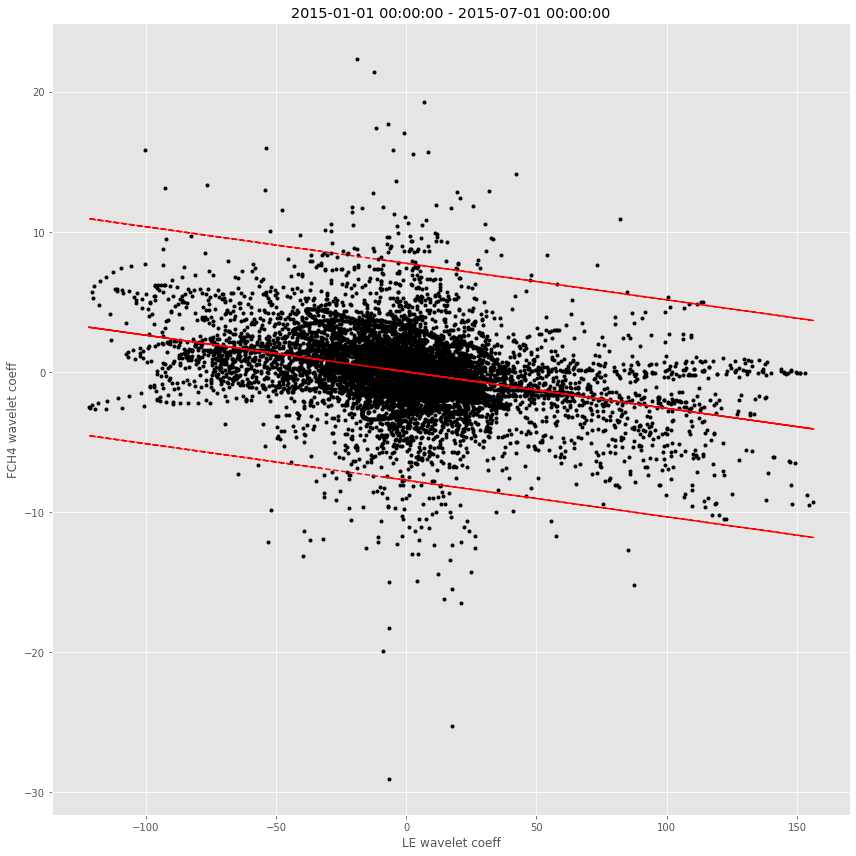

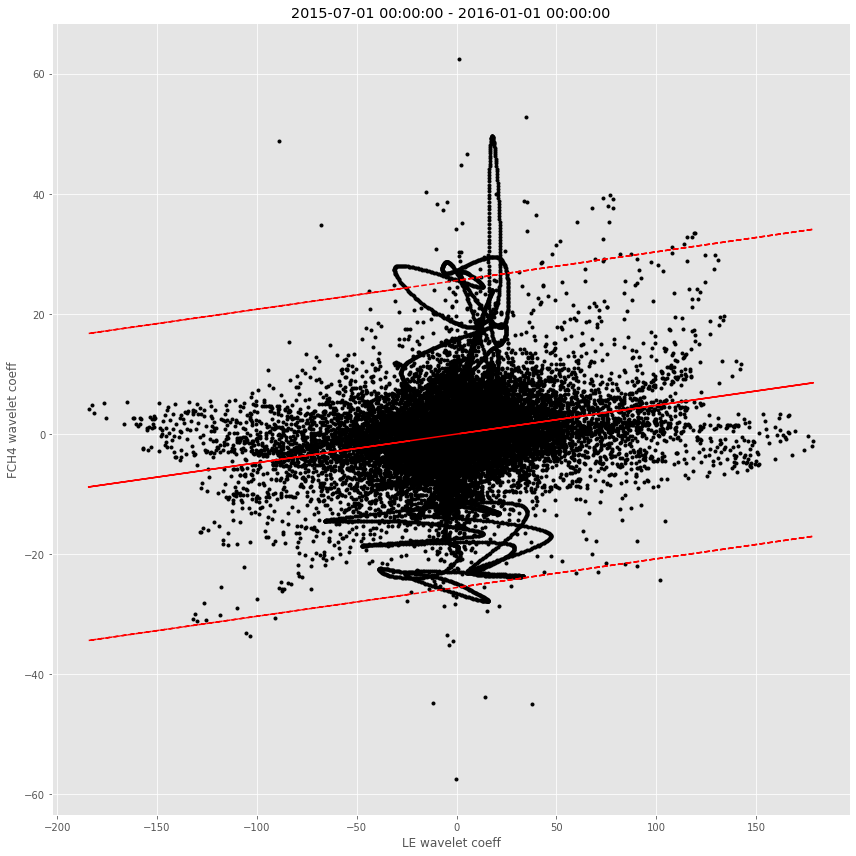

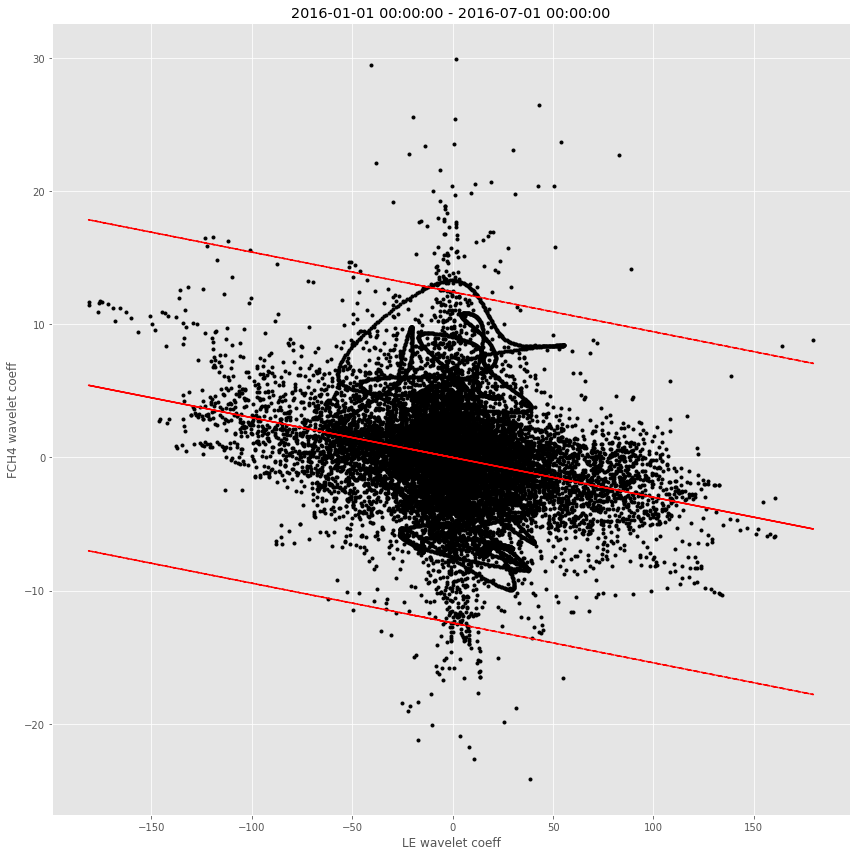

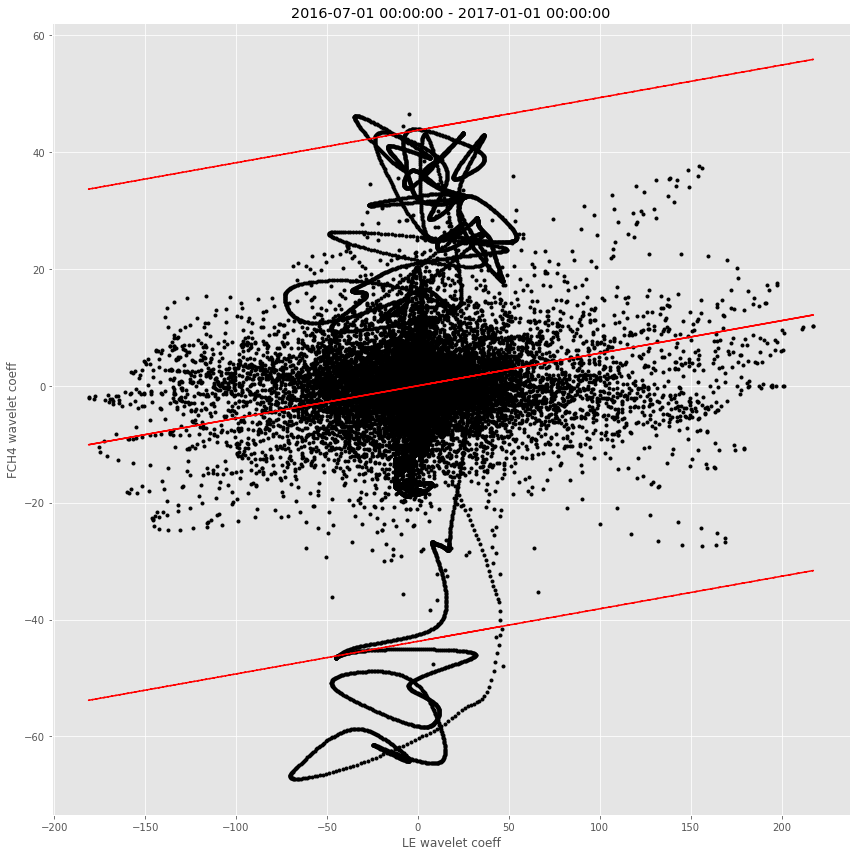

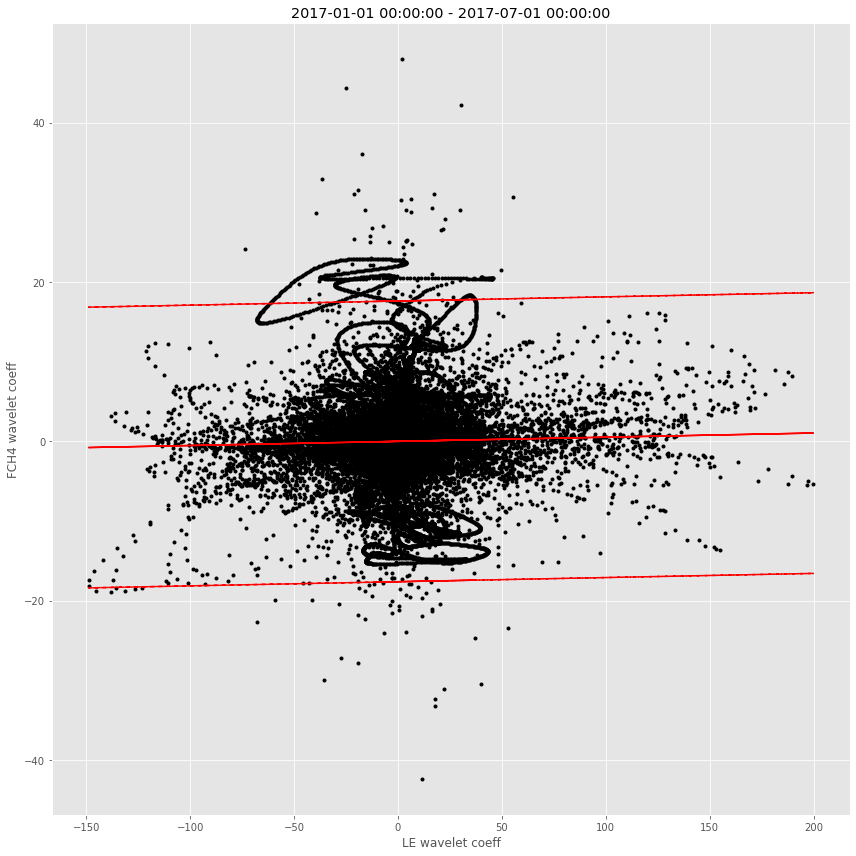

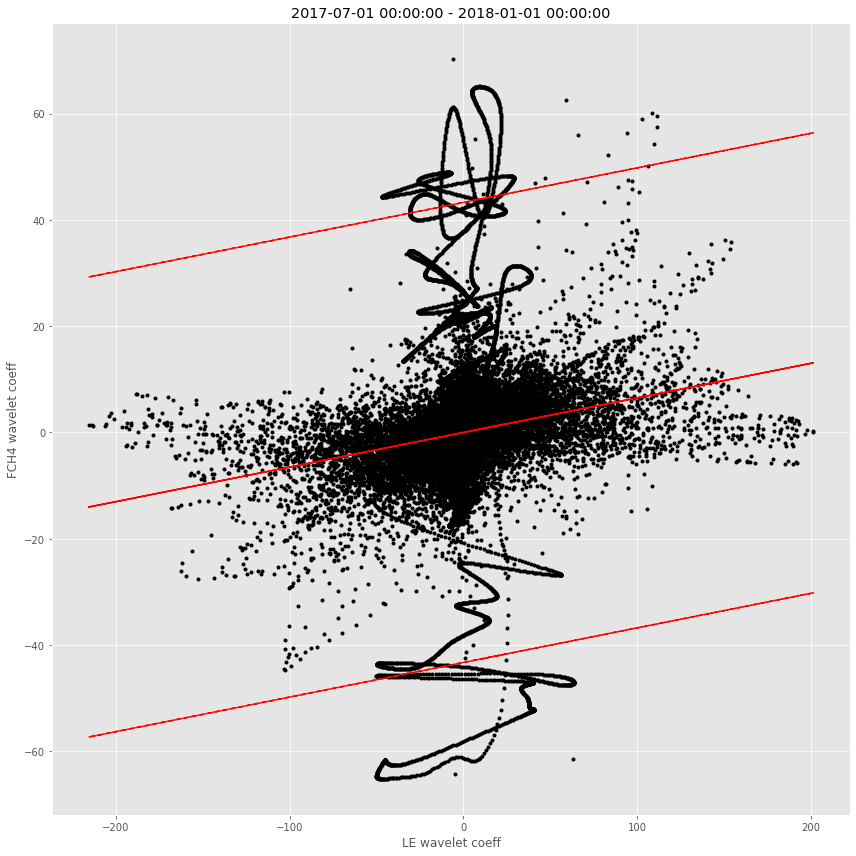

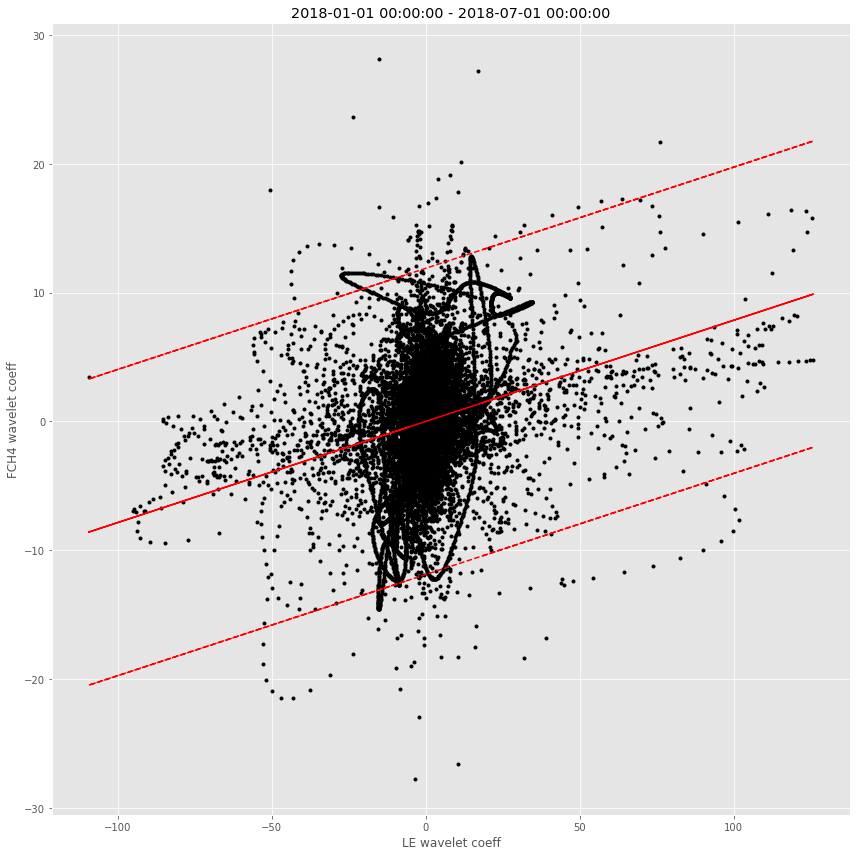

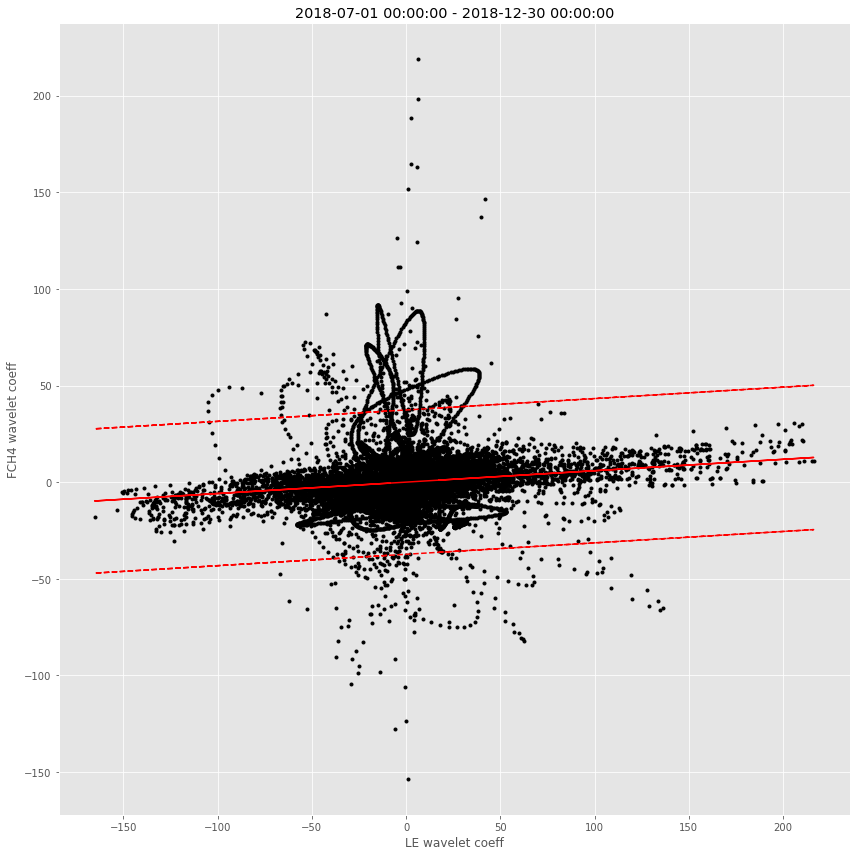

In [18]:
for idate in idates:
    dfw = df.loc[idate, :]
    dfw = dfw.loc[dfw['FCH4'].first_valid_index():dfw['FCH4'].last_valid_index()]
    
#     dfp = wave.wave(dfw) # process to new df
    dfp = wave.proc(dfw)
    
    # choose columns for partitioning
    Xcols = dfp.columns[dfp.columns.str.startswith('LE_w')]
    Ycols = dfp.columns[dfp.columns.str.startswith('FCH4_w')]
    
    # calc regression
    pred, [Xflat, Yflat], rmsd, r2 = wave.get_regr(dfp, Xcols, Ycols)
    
    # partition
    dfp = wave.part(dfp, pred, rmsd, r2)
    
    p.iwata7(Xflat, Yflat, pred, rmsd, xlabel='LE wavelet coeff', ylabel='FCH4 wavelet coeff', 
           title='{} - {}'.format(idate[0], idate[-1]), 
             filename = 'plot/20210713_iwata7_{}_{}.jpeg'.format(idate[0].year, idate[0].month))
    
    df.loc[dfw.index, 'rmsd'] = dfp.loc[:, 'rmsd'] # write back to df
    df.loc[dfw.index, 'r2'] = dfp.loc[:, 'r2'] # write back to df


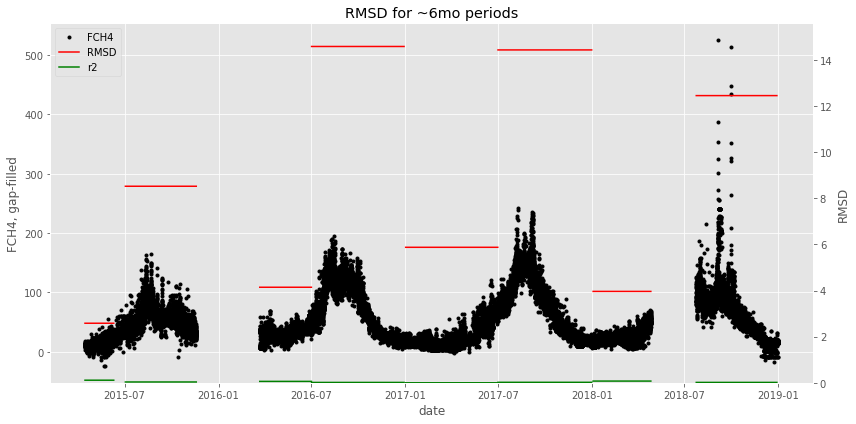

In [13]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(df.index, df.loc[:, 'FCH4_F'], 'k.', label='FCH4')
ax.set(xlabel = 'date', ylabel = 'FCH4, gap-filled', title = 'RMSD for ~6mo periods')

axr = ax.twinx()
axr.grid(False)
axr.yaxis.set_label_position('right')
axr.yaxis.tick_right()
axr.plot(df.index, df.loc[:, 'rmsd'], 'r-', label='RMSD')
axr.plot(df.index, df.loc[:, 'r2'], 'g-', label='r2')
axr.set_ylim([0, df.loc[:, 'rmsd'].max() + 1])
axr.set_ylabel('RMSD')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
linesr, labelsr = axr.get_legend_handles_labels()
ax.legend(lines + linesr, labels + labelsr, loc=2)

plt.tight_layout()
# plt.savefig('plot/20210709_rmsd_vs_date.jpeg')

## 2 month intervals

In [6]:
# df = wave.pd_read_from_drive('FLX_JP-BBY') # read from google drive into pd.DataFrame
# df = wave.read('FLX_JP-BBY', method='url')
df = wave.read('FLX_JP-BBY', method='file')

In [7]:
df = df.replace(-9999, np.nan) # replace missing with nan
df['date'] = pd.to_datetime(df['TIMESTAMP_START'], format='%Y%m%d%H%M') # parse timestamp to new column 'date'
df = df.set_index(df['date'])

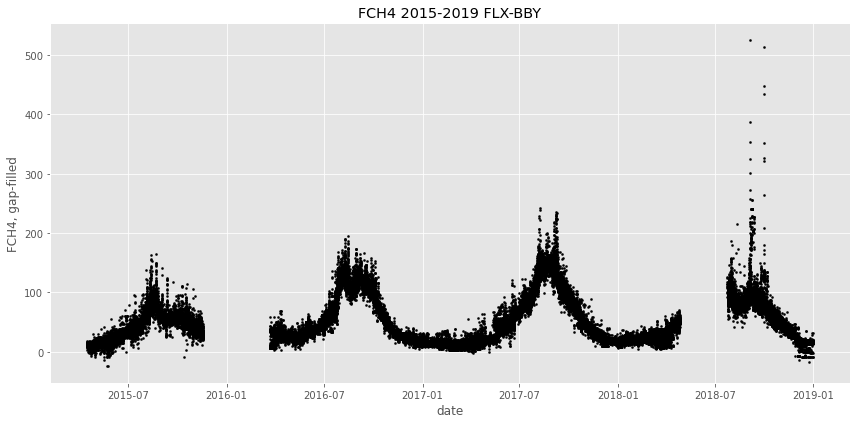

In [8]:
p.date(df.index, df['FCH4_F'], xlabel='date', ylabel='FCH4, gap-filled', title="FCH4 2015-2019 FLX-BBY")

In [19]:
months = pd.date_range(df.index[0], df.index[-1], freq = '2M')
date_ranges = [pd.date_range(months[i], months[i+1], freq='30min') for i in range(len(months)-1)]
date_ranges

[DatetimeIndex(['2015-01-31 00:00:00', '2015-01-31 00:30:00',
                '2015-01-31 01:00:00', '2015-01-31 01:30:00',
                '2015-01-31 02:00:00', '2015-01-31 02:30:00',
                '2015-01-31 03:00:00', '2015-01-31 03:30:00',
                '2015-01-31 04:00:00', '2015-01-31 04:30:00',
                ...
                '2015-03-30 19:30:00', '2015-03-30 20:00:00',
                '2015-03-30 20:30:00', '2015-03-30 21:00:00',
                '2015-03-30 21:30:00', '2015-03-30 22:00:00',
                '2015-03-30 22:30:00', '2015-03-30 23:00:00',
                '2015-03-30 23:30:00', '2015-03-31 00:00:00'],
               dtype='datetime64[ns]', length=2833, freq='30T'),
 DatetimeIndex(['2015-03-31 00:00:00', '2015-03-31 00:30:00',
                '2015-03-31 01:00:00', '2015-03-31 01:30:00',
                '2015-03-31 02:00:00', '2015-03-31 02:30:00',
                '2015-03-31 03:00:00', '2015-03-31 03:30:00',
                '2015-03-31 04:00:00', '2015-0

In [14]:
dates = pd.date_range('2015-01-01', '2018-12-30', freq = '2M')
dates

DatetimeIndex(['2015-01-31', '2015-03-31', '2015-05-31', '2015-07-31',
               '2015-09-30', '2015-11-30', '2016-01-31', '2016-03-31',
               '2016-05-31', '2016-07-31', '2016-09-30', '2016-11-30',
               '2017-01-31', '2017-03-31', '2017-05-31', '2017-07-31',
               '2017-09-30', '2017-11-30', '2018-01-31', '2018-03-31',
               '2018-05-31', '2018-07-31', '2018-09-30', '2018-11-30'],
              dtype='datetime64[ns]', freq='2M')

In [6]:
dates = [pd.date_range(start, stop, freq='30min') for [start, stop] in [['2015-01', '2015-07'], 
                                                                        ['2015-07', '2016-01'], 
                                                                        ['2016-01', '2016-07'], 
                                                                        ['2016-07', '2017-01'], 
                                                                        ['2017-01', '2017-07'], 
                                                                        ['2017-07', '2018-01'], 
                                                                        ['2018-01', '2018-07'], 
                                                                        ['2018-07', '2018-12-30']]]

In [33]:
df.index

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 00:30:00',
               '2015-01-01 01:00:00', '2015-01-01 01:30:00',
               '2015-01-01 02:00:00', '2015-01-01 02:30:00',
               '2015-01-01 03:00:00', '2015-01-01 03:30:00',
               '2015-01-01 04:00:00', '2015-01-01 04:30:00',
               ...
               '2018-12-31 18:30:00', '2018-12-31 19:00:00',
               '2018-12-31 19:30:00', '2018-12-31 20:00:00',
               '2018-12-31 20:30:00', '2018-12-31 21:00:00',
               '2018-12-31 21:30:00', '2018-12-31 22:00:00',
               '2018-12-31 22:30:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=70127, freq=None)

In [19]:
months = pd.date_range(df.index[0], df.index[-1], freq = '2M')
date_ranges = [pd.date_range(months[i], months[i+1], freq='30min') for i in range(len(months)-1)]
date_ranges

[DatetimeIndex(['2015-01-31 00:00:00', '2015-01-31 00:30:00',
                '2015-01-31 01:00:00', '2015-01-31 01:30:00',
                '2015-01-31 02:00:00', '2015-01-31 02:30:00',
                '2015-01-31 03:00:00', '2015-01-31 03:30:00',
                '2015-01-31 04:00:00', '2015-01-31 04:30:00',
                ...
                '2015-03-30 19:30:00', '2015-03-30 20:00:00',
                '2015-03-30 20:30:00', '2015-03-30 21:00:00',
                '2015-03-30 21:30:00', '2015-03-30 22:00:00',
                '2015-03-30 22:30:00', '2015-03-30 23:00:00',
                '2015-03-30 23:30:00', '2015-03-31 00:00:00'],
               dtype='datetime64[ns]', length=2833, freq='30T'),
 DatetimeIndex(['2015-03-31 00:00:00', '2015-03-31 00:30:00',
                '2015-03-31 01:00:00', '2015-03-31 01:30:00',
                '2015-03-31 02:00:00', '2015-03-31 02:30:00',
                '2015-03-31 03:00:00', '2015-03-31 03:30:00',
                '2015-03-31 04:00:00', '2015-0

In [14]:
dates = pd.date_range('2015-01-01', '2018-12-30', freq = '2M')
dates

DatetimeIndex(['2015-01-31', '2015-03-31', '2015-05-31', '2015-07-31',
               '2015-09-30', '2015-11-30', '2016-01-31', '2016-03-31',
               '2016-05-31', '2016-07-31', '2016-09-30', '2016-11-30',
               '2017-01-31', '2017-03-31', '2017-05-31', '2017-07-31',
               '2017-09-30', '2017-11-30', '2018-01-31', '2018-03-31',
               '2018-05-31', '2018-07-31', '2018-09-30', '2018-11-30'],
              dtype='datetime64[ns]', freq='2M')

In [6]:
dates = [pd.date_range(start, stop, freq='30min') for [start, stop] in [['2015-01', '2015-07'], 
                                                                        ['2015-07', '2016-01'], 
                                                                        ['2016-01', '2016-07'], 
                                                                        ['2016-07', '2017-01'], 
                                                                        ['2017-01', '2017-07'], 
                                                                        ['2017-07', '2018-01'], 
                                                                        ['2018-01', '2018-07'], 
                                                                        ['2018-07', '2018-12-30']]]